<a href="https://colab.research.google.com/github/Gladybams/Projet_recidive/blob/master/projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 
## Prevenir les cas de recidive grace à data science

## Problematiques
*1. Quelle méthode de machine Learning nous fournit la meilleure prédiction possible?*

*2. Existe-t-il une corrélation significative entre la classe de l'infraction initiale et la classe de récidive? L'hypothèse nulle en ce sens est qu'il n'y a en moyenne aucune différence statistiquement significative entre la classe de l'infraction initiale et la classe de la récidive. L'hypothèse alternative serait l'existence d'une agression dans la classe du crime commis.*

### On importe les librairies usuelles 

In [0]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

In [0]:
data1 = pd.read_csv("3_year_recidivism_elaborated_2.csv")
data2 = pd.read_csv("prison_recidivists.csv")

## Preprocessing

In [0]:
data1

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Main Supervising District,Release type: Paroled to Detainer united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,4JD,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,7JD,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,5JD,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,8JD,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,3JD,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,White - Hispanic,25-34,C Felony,Violent,Not Mentioned,Discharged End of Sentence,Yes,0
26016,2015,2018,White - Non-Hispanic,25-34,D Felony,Property,5JD,Paroled to Detainer,No,0
26017,2015,2018,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,1JD,Discharged End of Sentence,Yes,0
26018,2015,2018,White - Non-Hispanic,Under 25,D Felony,Drug,5JD,Parole,No,0


In [0]:
data2

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Part of Target Population,Main Supervising District,Recidivism - Return to Prison,Release Type.1,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type
0,2010,2013,White - Non-Hispanic,45-54,Aggravated Misdemeanor,Public Order,Sex Offender Registry/Residency,Parole,Yes,3JD,Yes,Parole,28,D Felony,Property,Theft
1,2010,2013,White - Non-Hispanic,Under 25,Aggravated Misdemeanor,Property,Theft,Discharged End of Sentence,No,NaN,Yes,Discharged End of Sentence,49,C Felony,Property,Theft
2,2010,2013,White - Non-Hispanic,Under 25,D Felony,Drug,Trafficking,Parole,Yes,4JD,Yes,Parole,53,Aggravated Misdemeanor,Public Order,OWI
3,2010,2013,American Indian or Alaska Native - Non-Hispanic,25-34,D Felony,Violent,Assault,Discharged End of Sentence,No,NaN,Yes,Discharged End of Sentence,57,C Felony,Violent,Robbery
4,2010,2013,White - Non-Hispanic,Under 25,D Felony,Property,Vandalism,Parole,Yes,2JD,Yes,Parole,58,Aggravated Misdemeanor,Public Order,Alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,2015,2018,White - Non-Hispanic,35-44,D Felony,Property,Forgery/Fraud,Discharged End of Sentence,No,8JD,Yes,Discharged End of Sentence,1088,C Felony,Drug,Trafficking
6714,2015,2018,Black - Non-Hispanic,Under 25,D Felony,Drug,Trafficking,Paroled to Detainer - Iowa,Yes,2JD,Yes,Paroled to Detainer - Iowa,1091,Aggravated Misdemeanor,Violent,Assault
6715,2015,2018,White - Non-Hispanic,45-54,D Felony,Property,Theft,Discharged End of Sentence,Yes,2JD,Yes,Discharged End of Sentence,1092,Aggravated Misdemeanor,Drug,Drug Possession
6716,2015,2018,White - Non-Hispanic,45-54,C Felony,Drug,Trafficking,Parole,No,1JD,Yes,Parole,1093,C Felony,Drug,Trafficking


In [0]:
# faire la jointure entre les 2 tables

dataset = data2.join(data1, lsuffix='', rsuffix='_only')

dataset.head(5)

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Part of Target Population,Main Supervising District,Recidivism - Return to Prison,Release Type.1,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Fiscal Year Released_only,Recidivism Reporting Year_only,Race - Ethnicity_only,Age At Release _only,Convicting Offense Classification_only,Convicting Offense Type_only,Main Supervising District_only,Release type: Paroled to Detainer united,Part of Target Population_only,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,45-54,Aggravated Misdemeanor,Public Order,Sex Offender Registry/Residency,Parole,Yes,3JD,Yes,Parole,28,D Felony,Property,Theft,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,4JD,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,Under 25,Aggravated Misdemeanor,Property,Theft,Discharged End of Sentence,No,NaN,Yes,Discharged End of Sentence,49,C Felony,Property,Theft,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,7JD,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,Under 25,D Felony,Drug,Trafficking,Parole,Yes,4JD,Yes,Parole,53,Aggravated Misdemeanor,Public Order,OWI,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,5JD,Parole,Yes,1
3,2010,2013,American Indian or Alaska Native - Non-Hispanic,25-34,D Felony,Violent,Assault,Discharged End of Sentence,No,NaN,Yes,Discharged End of Sentence,57,C Felony,Violent,Robbery,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,8JD,Parole,Yes,1
4,2010,2013,White - Non-Hispanic,Under 25,D Felony,Property,Vandalism,Parole,Yes,2JD,Yes,Parole,58,Aggravated Misdemeanor,Public Order,Alcohol,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,3JD,Parole,Yes,1


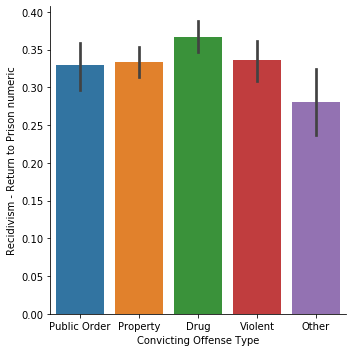

In [0]:
sns.catplot(x="Convicting Offense Type", y="Recidivism - Return to Prison numeric", data= dataset, kind="bar")
plt.show()

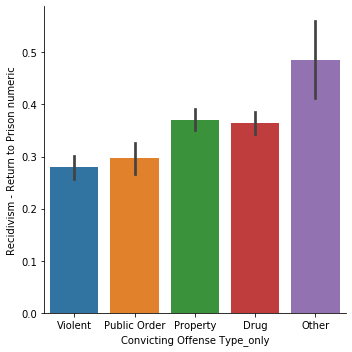

In [0]:
sns.catplot(x="Convicting Offense Type_only", y="Recidivism - Return to Prison numeric", data= dataset, kind="bar")
plt.show()

In [0]:
# l'ensemble des colonnes à selectionner
column_list = data2.columns.to_list()
column_list_add = ['Recidivism - Return to Prison numeric',
                   'New Conviction Offense Classification',
                   'New Conviction Offense Type',
                   'New Conviction Offense Sub Type']
column_list.extend(column_list_add)
#selectionner l'ensemble des colonnes utiles"
dataset = dataset[column_list]

In [0]:
dataset.shape

(6718, 20)

In [0]:
columns_pred = ['Days to Recidivism',
                'Fiscal Year Released',
                'Recidivism Reporting Year',
                'Race - Ethnicity',
                'Age At Release ' ,
                'Convicting Offense Classification',
                'Convicting Offense Type',
                'Release Type',
                'Recidivism - Return to Prison numeric']

columns_list = {'Days to Recidivism' : 'Days_to_Recidivism',
                'Fiscal Year Released' : 'Year_Released',
                'Recidivism Reporting Year' : 'Recidivism_Year', 
                'Race - Ethnicity' : 'Race',
                'Age At Release ' : 'Age',
                'Convicting Offense Classification' : 'Convicting_class',
                'Convicting Offense Type' : 'Convicting_Type',
                'Release Type' : 'Release_Type',
                'Recidivism - Return to Prison numeric' : 'Recidivism'}

In [0]:
dataset[columns_pred]

,Days to Recidivism,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Release Type,Recidivism - Return to Prison numeric
0,28,2010,2013,White - Non-Hispanic,45-54,Aggravated Misdemeanor,Public Order,Parole,1
1,49,2010,2013,White - Non-Hispanic,Under 25,Aggravated Misdemeanor,Property,Discharged End of Sentence,1
2,53,2010,2013,White - Non-Hispanic,Under 25,D Felony,Drug,Parole,1
3,57,2010,2013,American Indian or Alaska Native - Non-Hispanic,25-34,D Felony,Violent,Discharged End of Sentence,1
4,58,2010,2013,White - Non-Hispanic,Under 25,D Felony,Property,Parole,1
...,...,...,...,...,...,...,...,...,...
6713,1088,2015,2018,White - Non-Hispanic,35-44,D Felony,Property,Discharged End of Sentence,0
6714,1091,2015,2018,Black - Non-Hispanic,Under 25,D Felony,Drug,Paroled to Detainer - Iowa,0
6715,1092,2015,2018,White - Non-Hispanic,45-54,D Felony,Property,Discharged End of Sentence,0
6716,1093,2015,2018,White - Non-Hispanic,45-54,C Felony,Drug,Parole,0


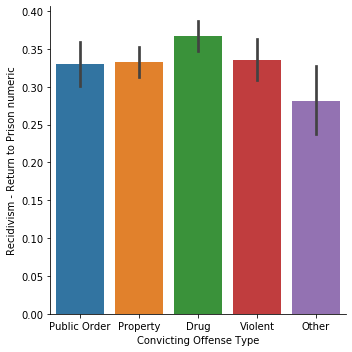

In [0]:
sns.catplot(x="Convicting Offense Type", y="Recidivism - Return to Prison numeric", data= dataset, kind="bar")
plt.show()

In [0]:
data_pred = (dataset[columns_pred].rename(columns = columns_list))

In [0]:
data_pred = data_pred.T.groupby(level=0).first().T

In [0]:
data_pred.head()

,Age,Convicting_Type,Convicting_class,Days_to_Recidivism,Race,Recidivism,Recidivism_Year,Release_Type,Year_Released
0,45-54,Public Order,Aggravated Misdemeanor,28,White - Non-Hispanic,1,2013,Parole,2010
1,Under 25,Property,Aggravated Misdemeanor,49,White - Non-Hispanic,1,2013,Discharged End of Sentence,2010
2,Under 25,Drug,D Felony,53,White - Non-Hispanic,1,2013,Parole,2010
3,25-34,Violent,D Felony,57,American Indian or Alaska Native - Non-Hispanic,1,2013,Discharged End of Sentence,2010
4,Under 25,Property,D Felony,58,White - Non-Hispanic,1,2013,Parole,2010


In [0]:
Recidive = data_pred.query('Recidivism == 1')
no_recidive = data_pred.query('Recidivism == 0')

In [0]:
Taux_recidive = data_pred["Recidivism"].mean()*100

In [0]:
Taux_recidive

34.07264066686514

Traitement des valeurs manquantes

In [0]:
print(data_pred.isnull().sum())

Age                     0
Convicting_Type         0
Convicting_class        0
Days_to_Recidivism      0
Race                    0
Recidivism              0
Recidivism_Year         0
Release_Type          350
Year_Released           0
dtype: int64


In [0]:
data_pred['Release_Type'].fillna(0, inplace=True)

Dummification

In [0]:
def transf_to_dommies(column):

    dictionnaire = {}

    liste_val  = list(set(column))

    i=0

    for elt in liste_val:

        dictionnaire[elt] = i

        i = i+1

    dommies = column.map(dictionnaire)

    return dommies

In [0]:
data_pred['Convicting_Type'] = transf_to_dommies(data_pred.Convicting_Type)
data_pred['Release_Type'] = transf_to_dommies(data_pred.Release_Type)
data_pred['Race'] = transf_to_dommies(data_pred.Race)
data_pred['Age'] = transf_to_dommies(data_pred.Age)
data_pred['Convicting_class'] = transf_to_dommies(data_pred.Convicting_class)

In [0]:
data_pred

,Age,Convicting_Type,Convicting_class,Days_to_Recidivism,Race,Recidivism,Recidivism_Year,Release_Type,Year_Released
0,3,3,7,28,6,1,2013,5,2010
1,2,4,7,49,6,1,2013,0,2010
2,2,2,6,53,6,1,2013,5,2010
3,4,0,6,57,4,1,2013,0,2010
4,2,4,6,58,6,1,2013,5,2010
...,...,...,...,...,...,...,...,...,...
6713,0,4,6,1088,6,0,2018,0,2015
6714,2,2,6,1091,3,0,2018,6,2015
6715,3,4,6,1092,6,0,2018,0,2015
6716,3,2,5,1093,6,0,2018,5,2015


On coupe le dataset en deux. X comprenant les variables explicatives et y contenant la variable cible

In [0]:
X = data_pred.iloc[:, :-1]
y = data_pred.iloc[:, -1:]

In [0]:
data_pred.dropna(axis = 0, inplace = True)

### On transforme l'echantillon en X_train et en y_train

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

### Normalisation 

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # on instancie l'objet modele de normalisation

X_train = sc.fit_transform(X_train) # on applique la normalisation sc_X fittee a l'echantillon X_train
X_test = sc.transform(X_test)

##MODELES

## Regression logistique

In [0]:
# Initiate the LR model with random hyperparameters
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',dual=False,max_iter=110)

In [0]:
lr.fit(X_train ,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr.score(X_train, y_train)

0.7681429103088947

In [0]:
print("Logistic Regression score : {}".format(lr.score(X_test, y_test)))

Logistic Regression score : 0.7544642857142857


C'est nécessaire de valider la stabilité de notre modèle. On ne peut tout simplement pas adapter le modèle à nos données d'entraînement et espérez qu'il fonctionnera avec précision pour les données réelles qu'il n'a jamais vues auparavant. On a besoin d'une sorte d'assurance c'est pour cela on utlise la cross validation. 

In [0]:
from sklearn.model_selection import cross_val_score

cross validation 

In [0]:
# Cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(lr, X_test, y_test, cv=kfold, scoring='accuracy')
print("Le score après cross validation est {}".format(result.mean()))

Le score après cross validation est 0.7477678571428571


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

In [0]:
y_pred = lr.predict(X_test)

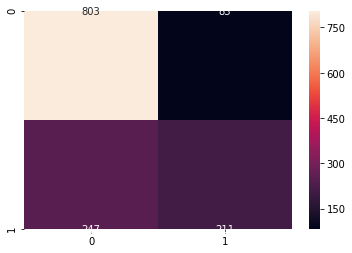

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

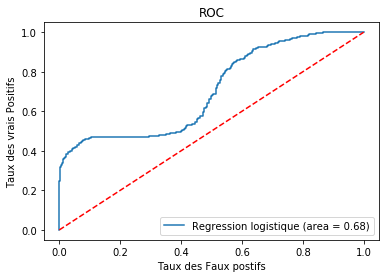

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regression logistique (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taux des Faux postifs')
plt.ylabel('Taux des vrais Positifs')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random forest regressor

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(class_weight = 'balanced')
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = rf.score(X_test, y_test)

In [0]:
f1

0.9989094874591058

In [0]:
recall

1.0

In [0]:
accuracy

0.9992559523809523

## GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [0]:
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.659274 using {'dual': True, 'max_iter': 130}
Execution time: 3.9001290798187256 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [0]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.659274 using {'C': 2.0, 'dual': True, 'max_iter': 100}
Execution time: 7.7661292552948 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + 'ms')

Best: 0.659274 using {'max_iter': 100, 'dual': True, 'C': 1.0}
Execution time: 3.6331546306610107ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier_gini = DecisionTreeClassifier(criterion="gini", max_depth = 10) #min_sample_leaf = 20)
classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
classifier_gini.score(X_test, y_test)

0.9992559523809523

## SVM

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')

In [0]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svm.score(X_train, y_train)

0.9776702642352065

In [0]:
svm.score(X_test, y_test)

0.9717261904761905

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   31.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [0]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.7455357142857143